## 可视化结果

### 安装
在算例的依赖包基础上（见[异常检测算例](https://github.com/transcope/xopshub/tree/main/example/README.md)），安装`adtk`包：

```
pip install adtk
```

### 可视化
这里给出了一个可视化例子，将KPI数据集中的29种不同的KPI指标的测试集数据可视化，分别展示出数据中的正常数据点和异常数据点。同时，将输入的模型侦测结果同样可视化，直观展示模型效果，为后续分析和优化提供帮助。

In [1]:
import sys
import os

project_dir = os.path.dirname(os.getcwd())
sys.path.append(project_dir)

In [2]:
from example import ADdataset, Preprocessor, Evaluator
from adtk.visualization import plot
import pandas as pd
import pickle

In [3]:
# 数据路径
data_dir = os.path.join(project_dir, "data")
# 数据集
dataset = "KPI"
# 评价方法
method = -1
# 模型名称
model = "opprentice"
# 模型结果路径
save_dir = os.path.join(project_dir, "visualization/result")

In [4]:
# 读取数据集
data = ADdataset(root=data_dir, dataset=dataset)

In [5]:
# 读取模型结果
with open(os.path.join(save_dir, "{}_prediction_{}.pkl".format(model, dataset)), "rb") as f:
    all_preds = pickle.load(f)

In [6]:
# 可视化数据准备
def get_plot_data(data, label, score):
    # 预处理
    pre = Preprocessor(data, label, fillna=False)
    df, labels, missing = pre.process()
    df["timestamp"] = pd.to_datetime(df["timestamp"], unit="s")
    df = df.set_index("timestamp")
    df["label"] = labels

    # 寻找阈值
    evaluator = Evaluator(score, labels, missing, method=-1)
    result, best_th = evaluator.evaluate()
    df["pred"] = (score >= best_th).astype("int")
    return df

/home/tigergraph/anaconda3/envs/aiops/lib/python3.7/site-packages/adtk/visualization/_visualization.py:248: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  nrows=len(curve_group), figsize=figsize, sharex=True


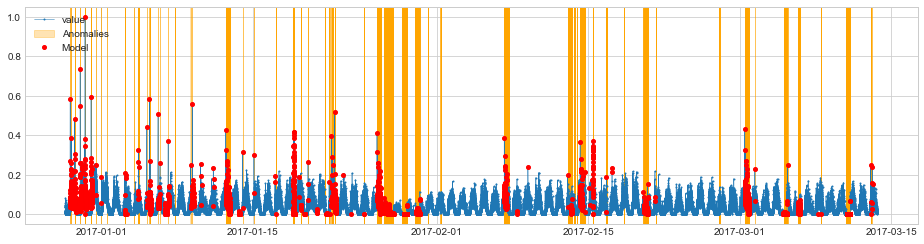

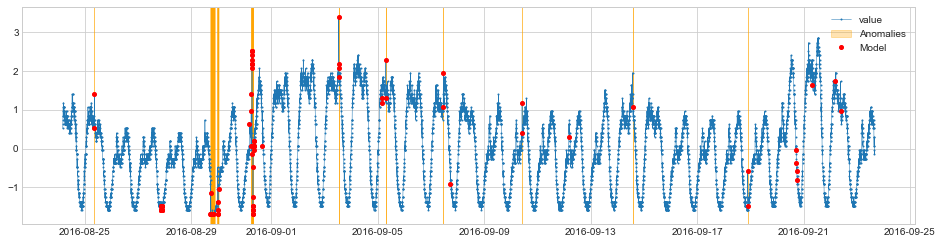

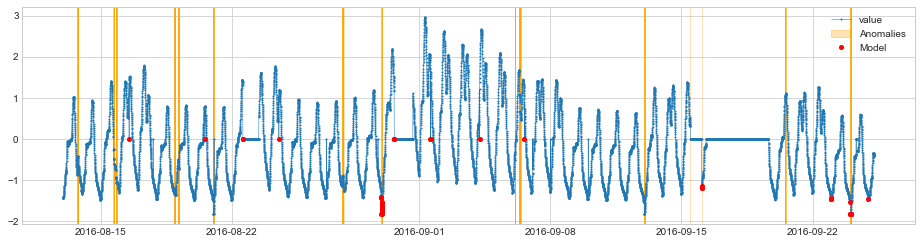

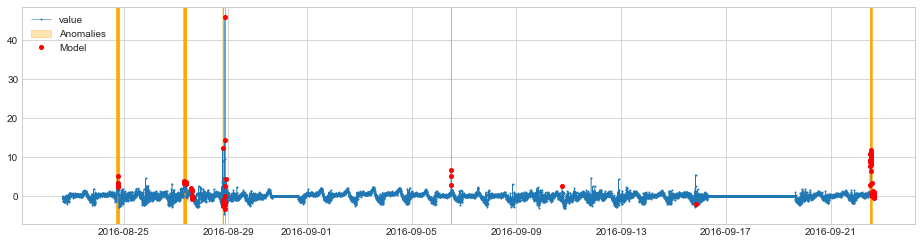

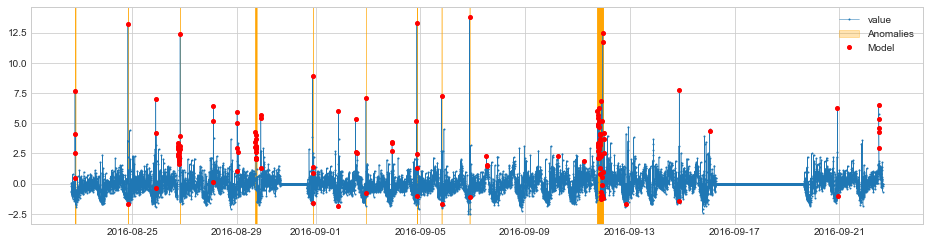

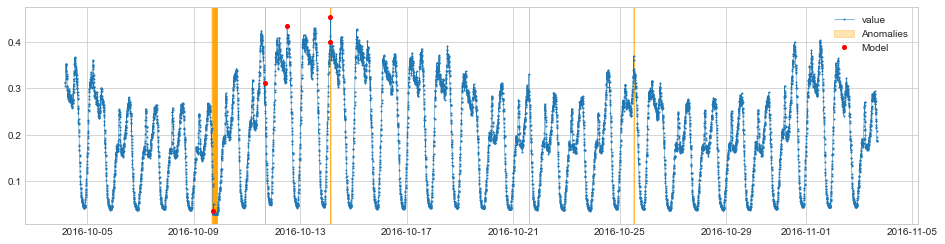

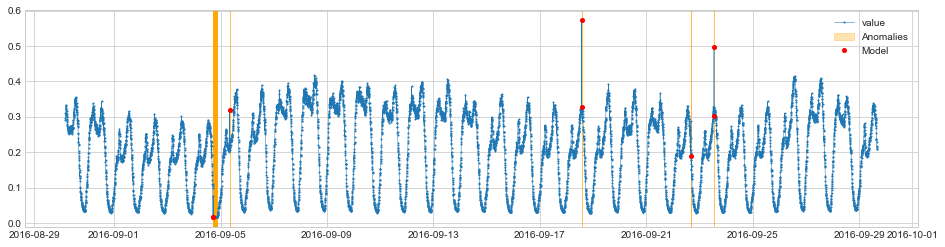

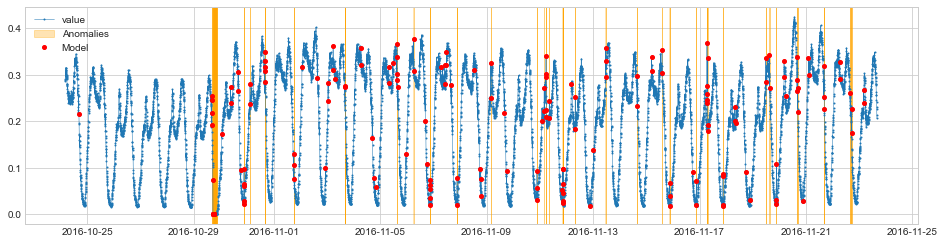

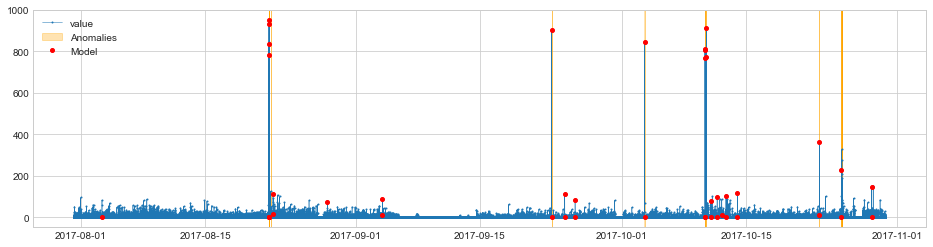

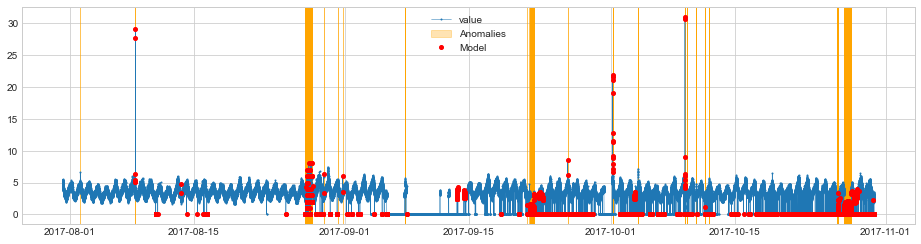

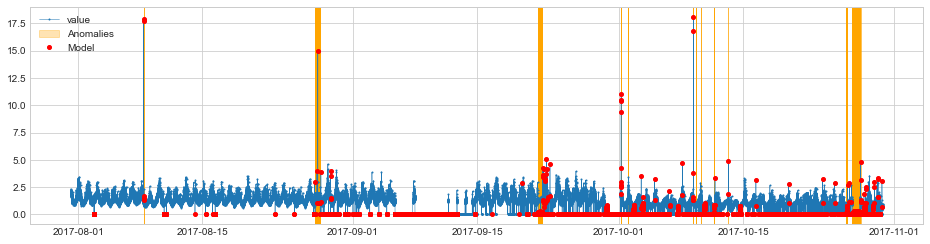

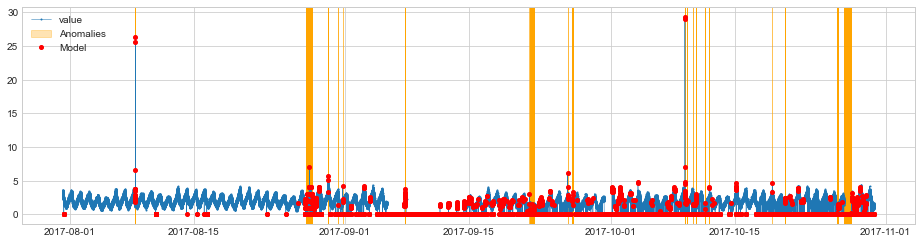

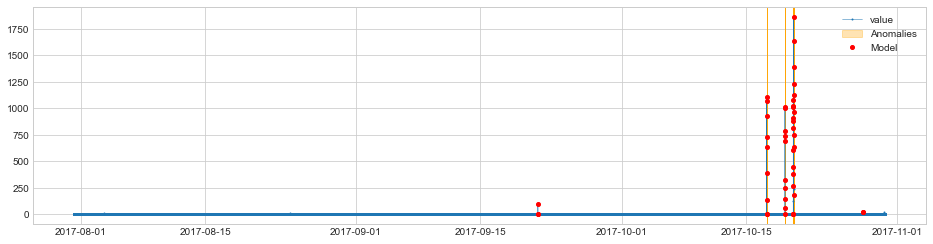

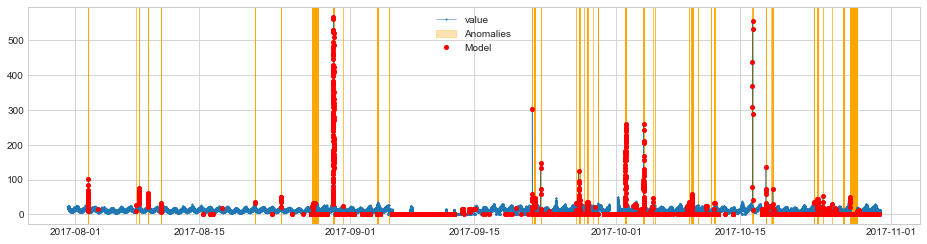

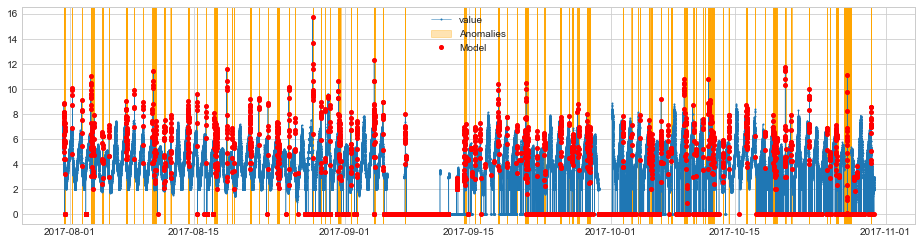

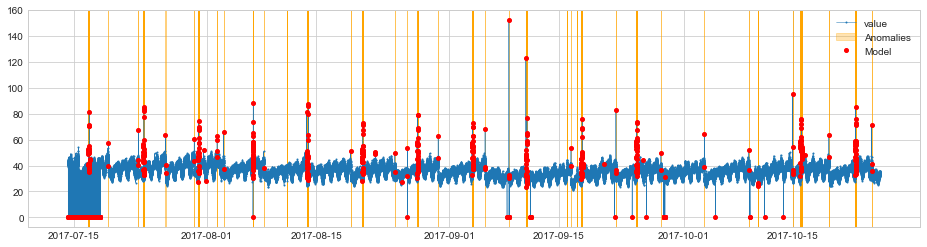

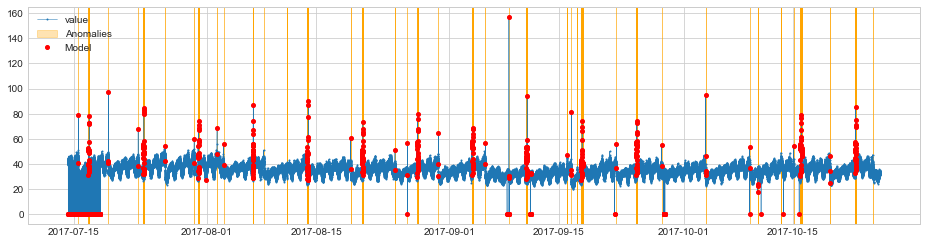

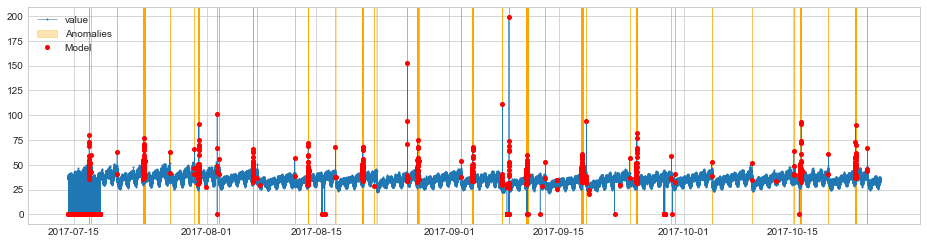

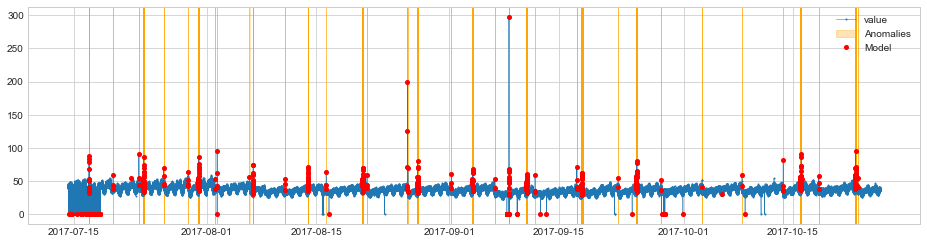

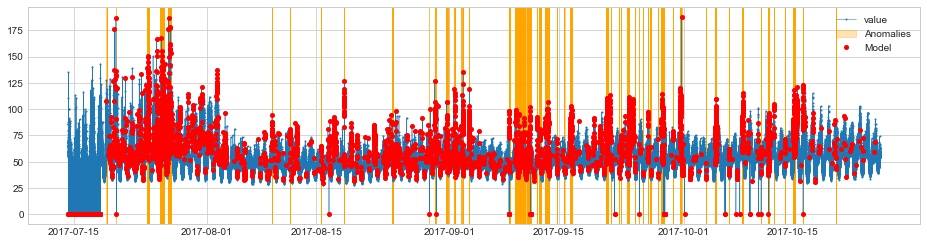

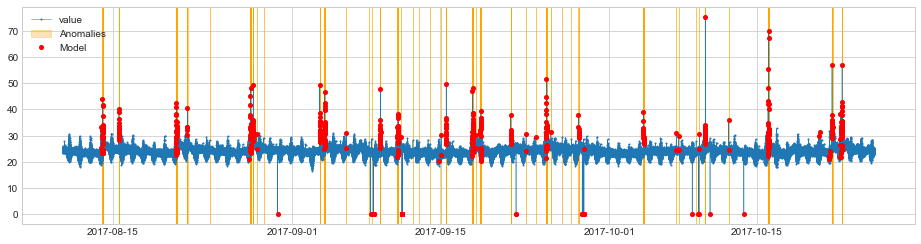

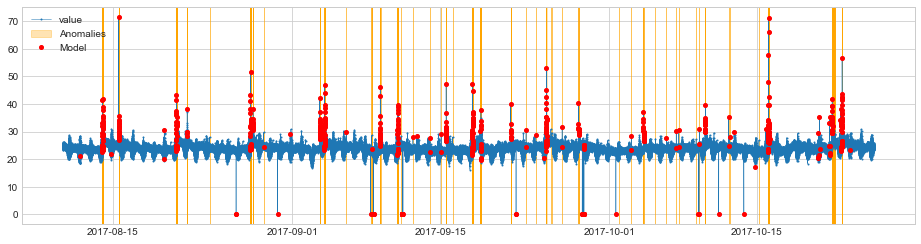

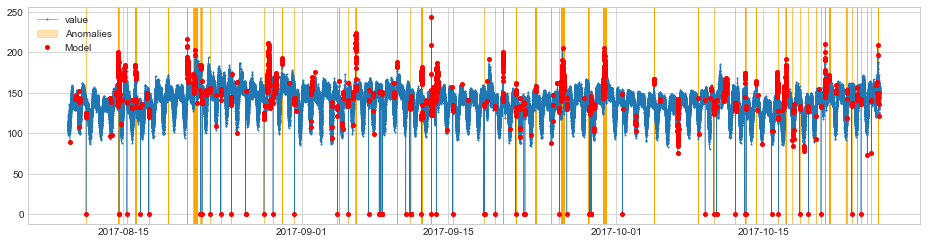

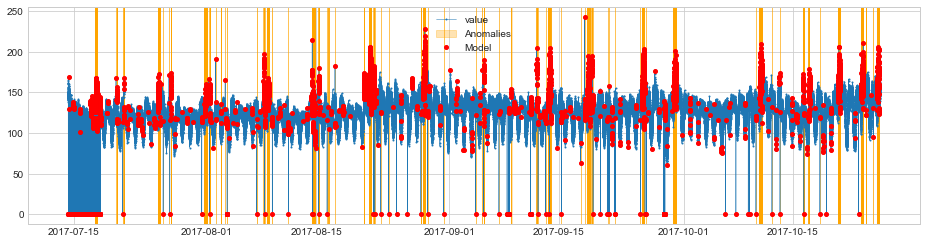

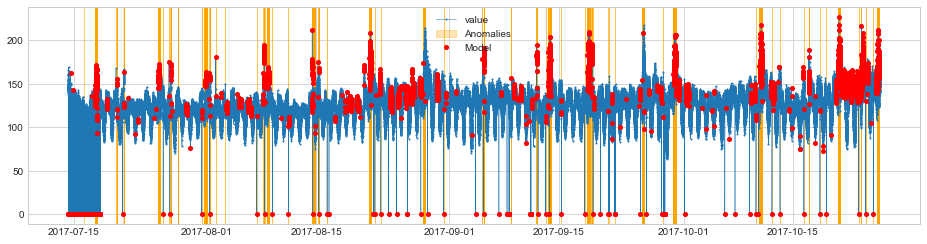

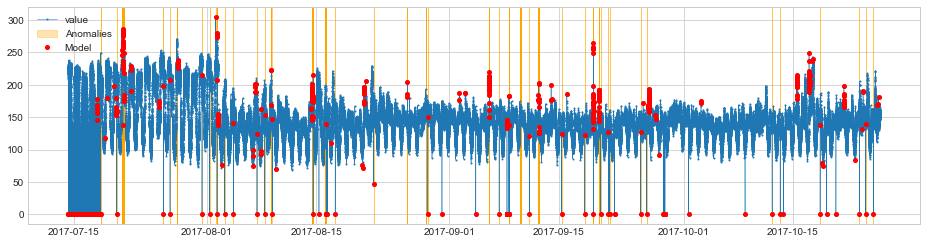

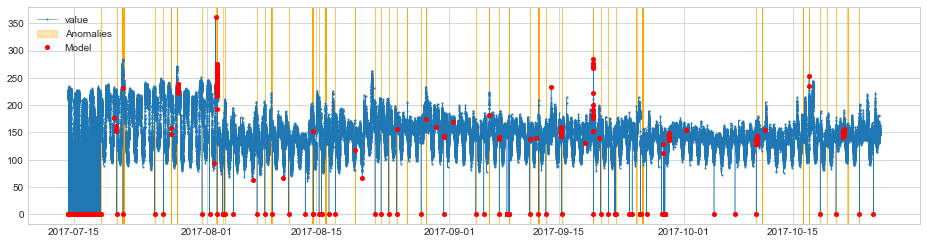

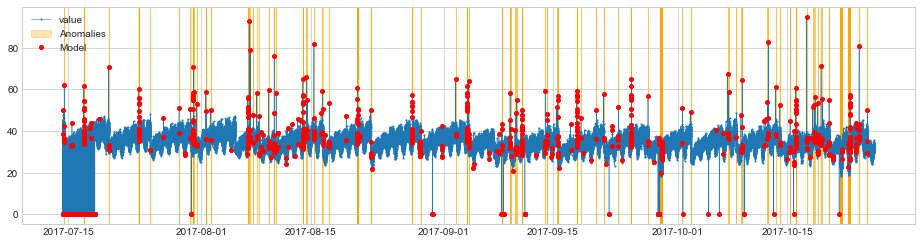

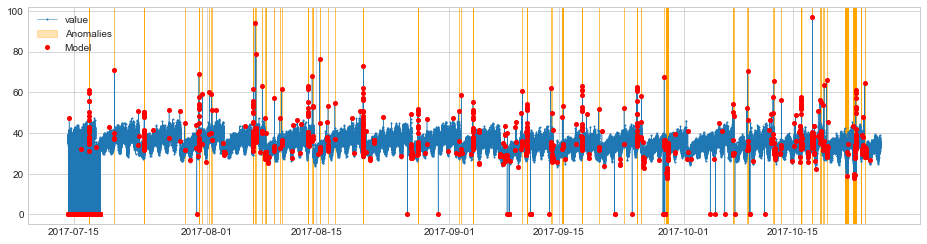

In [7]:
# 可视化
for name, (train_df, train_label), (test_df, test_label) in data:
    df = get_plot_data(test_df, test_label, all_preds[name])
    ax = plot(df, anomaly={"Anomalies": df["label"], "Model": df["pred"]}, curve_group=["value"], 
    anomaly_tag={"Anomalies": "span", "Model": "marker"}, anomaly_color={"Anomalies": "orange", "Model": "red"})
    